In [3]:
import pandas as pd
import numpy as np
import dtale
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [1]:
df = pd.read_csv('clean_data.csv')
df

NameError: name 'pd' is not defined

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
df.describe()

In [ ]:
d = dtale.show(df)

In [ ]:
d.open_browser()

In [ ]:
# pip install sweetviz

In [10]:
import sweetviz as sv

In [11]:
report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [12]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
# from seeing the report we can say that Number of Records has no impact on the data as all the values are 1 so it is safe to drop that particular feature
df = df.drop('Number of Records',axis=1)
df

,Unnamed: 0,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country
0,0,0.020,73.7125,87931.0,13.0,26998.0,5.479006e+10,0.035,60.0,336.0,...,67.0,0.0,0.342,0.619,0.039,31719449.0,0.599,1.020000e+08,1.930000e+08,Algeria
1,1,0.050,52.1000,9542.0,13.0,7499.0,9.129595e+09,0.034,22.0,336.0,...,44.0,0.0,0.476,0.499,0.025,13924930.0,0.324,3.400000e+07,1.460000e+08,Angola
2,2,0.043,71.0875,1617.0,40.0,1983.0,2.359122e+09,0.043,15.0,52.0,...,53.0,0.0,0.454,0.517,0.029,6949366.0,0.383,7.700000e+07,5.000000e+07,Benin
3,3,0.027,18.7250,4276.0,40.0,1836.0,5.788312e+09,0.047,152.0,52.0,...,49.0,0.1,0.383,0.587,0.029,1755375.0,0.532,2.270000e+08,2.090000e+08,Botswana
4,4,0.046,45.4875,1041.0,84.0,765.0,2.610959e+09,0.051,12.0,216.0,...,49.0,0.0,0.468,0.505,0.028,11607944.0,0.178,2.300000e+07,3.000000e+07,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,2699,0.013,0.0000,161.0,40.0,76.0,2.671401e+09,0.033,2718.0,52.0,...,74.0,0.4,0.292,0.637,0.071,32427.0,0.911,4.890000e+08,1.400000e+08,Turks and Caicos Islands
2700,2700,0.013,46.4000,91118.0,5.0,2132446.0,1.624460e+13,0.179,8895.0,175.0,...,76.0,1.0,0.196,0.667,0.136,313873685.0,0.811,2.000920e+11,1.265730e+11,United States
2701,2701,0.015,41.9000,737.0,7.0,19986.0,5.000435e+10,0.089,1308.0,310.0,...,74.0,1.5,0.220,0.639,0.140,3395253.0,0.948,2.222000e+09,1.028000e+09,Uruguay
2702,2702,0.020,61.9000,91118.0,144.0,27086.0,3.812862e+11,0.046,593.0,792.0,...,72.0,1.0,0.288,0.652,0.060,29954782.0,0.889,9.040000e+08,3.202000e+09,"Venezuela, RB"


In [14]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [15]:
df_norm = norm_func(df.iloc[:,:22])
df_norm

,Unnamed: 0,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound
0,0.00000,0.282609,0.217377,0.010610,0.017316,0.009895,0.003369,0.124424,0.005855,0.125193,...,0.019153,0.666667,0.588235,0.000000,0.586387,0.377604,0.149378,0.023470,0.563181,0.000506
1,0.00037,0.934783,0.153642,0.001151,0.017316,0.002746,0.000558,0.119816,0.002019,0.125193,...,0.207056,0.166667,0.137255,0.000000,0.937173,0.065104,0.091286,0.010296,0.263617,0.000166
2,0.00074,0.782609,0.209636,0.000194,0.056277,0.000724,0.000141,0.161290,0.001312,0.015456,...,0.010887,0.375000,0.313725,0.000000,0.879581,0.111979,0.107884,0.005131,0.327887,0.000381
3,0.00111,0.434783,0.055220,0.000515,0.056277,0.000670,0.000352,0.179724,0.015142,0.015456,...,0.030242,0.270833,0.235294,0.034483,0.693717,0.294271,0.107884,0.001286,0.490196,0.001131
4,0.00148,0.847826,0.134142,0.000125,0.119769,0.000278,0.000157,0.198157,0.001009,0.078825,...,0.010887,0.270833,0.235294,0.000000,0.916230,0.080729,0.103734,0.008580,0.104575,0.000111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.99852,0.130435,0.000000,0.000019,0.056277,0.000025,0.000161,0.115207,0.274177,0.015456,...,0.010887,0.854167,0.725490,0.137931,0.455497,0.424479,0.282158,0.000010,0.903050,0.002440
2700,0.99889,0.130435,0.136833,0.010995,0.005772,0.781766,1.000000,0.788018,0.897739,0.062983,...,0.005645,0.875000,0.764706,0.344828,0.204188,0.502604,0.551867,0.232369,0.794118,1.000000
2701,0.99926,0.173913,0.123562,0.000088,0.008658,0.007324,0.003074,0.373272,0.131839,0.115147,...,0.021573,0.854167,0.725490,0.517241,0.267016,0.429688,0.568465,0.002500,0.943355,0.011101
2702,0.99963,0.282609,0.182542,0.010995,0.206349,0.009927,0.023468,0.175115,0.059661,0.301391,...,0.032056,0.812500,0.686275,0.344828,0.445026,0.463542,0.236515,0.022164,0.879085,0.004514


In [29]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df_norm.iloc[:,1:])
df_norm    # normalization  as the  values become 

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound
0,0.282609,0.217377,0.010610,0.017316,0.009895,0.003369,0.124424,0.005855,0.125193,0.230216,...,0.019153,0.666667,0.588235,0.000000,0.586387,0.377604,0.149378,0.023470,0.563181,0.000506
1,0.934783,0.153642,0.001151,0.017316,0.002746,0.000558,0.119816,0.002019,0.125193,0.906475,...,0.207056,0.166667,0.137255,0.000000,0.937173,0.065104,0.091286,0.010296,0.263617,0.000166
2,0.782609,0.209636,0.000194,0.056277,0.000724,0.000141,0.161290,0.001312,0.015456,0.633094,...,0.010887,0.375000,0.313725,0.000000,0.879581,0.111979,0.107884,0.005131,0.327887,0.000381
3,0.434783,0.055220,0.000515,0.056277,0.000670,0.000352,0.179724,0.015142,0.015456,0.374101,...,0.030242,0.270833,0.235294,0.034483,0.693717,0.294271,0.107884,0.001286,0.490196,0.001131
4,0.847826,0.134142,0.000125,0.119769,0.000278,0.000157,0.198157,0.001009,0.078825,0.676259,...,0.010887,0.270833,0.235294,0.000000,0.916230,0.080729,0.103734,0.008580,0.104575,0.000111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.130435,0.000000,0.000019,0.056277,0.000025,0.000161,0.115207,0.274177,0.015456,0.014388,...,0.010887,0.854167,0.725490,0.137931,0.455497,0.424479,0.282158,0.000010,0.903050,0.002440
2700,0.130435,0.136833,0.010995,0.005772,0.781766,1.000000,0.788018,0.897739,0.062983,0.028777,...,0.005645,0.875000,0.764706,0.344828,0.204188,0.502604,0.551867,0.232369,0.794118,1.000000
2701,0.173913,0.123562,0.000088,0.008658,0.007324,0.003074,0.373272,0.131839,0.115147,0.057554,...,0.021573,0.854167,0.725490,0.517241,0.267016,0.429688,0.568465,0.002500,0.943355,0.011101
2702,0.282609,0.182542,0.010995,0.206349,0.009927,0.023468,0.175115,0.059661,0.301391,0.079137,...,0.032056,0.812500,0.686275,0.344828,0.445026,0.463542,0.236515,0.022164,0.879085,0.004514


# Hierarchical Clustering

In [31]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

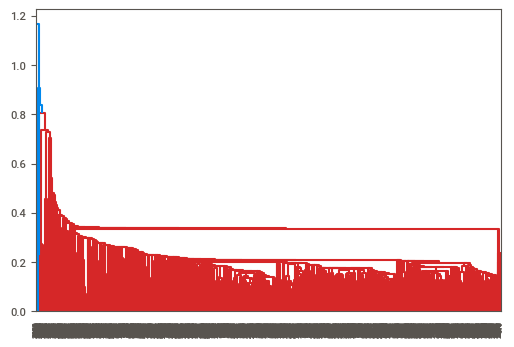

In [32]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

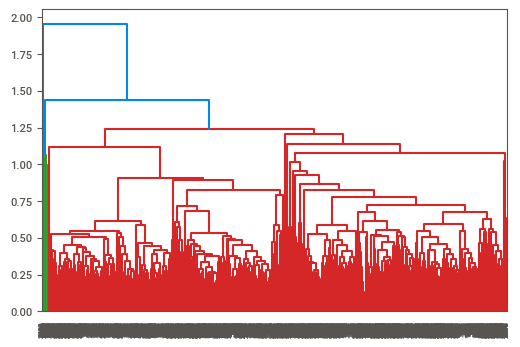

In [33]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))   #most commonly used

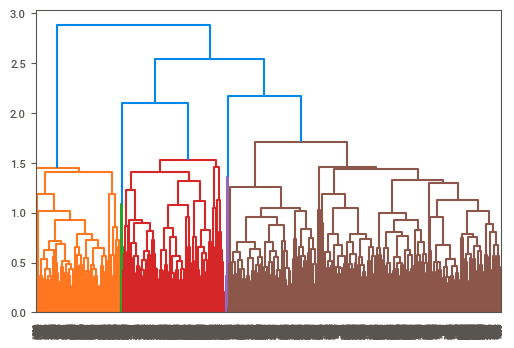

In [34]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

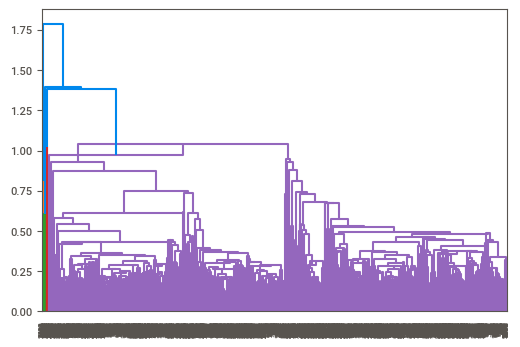

In [35]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='centroid'))

In [36]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [37]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters']) # type of dataframe
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
2699,0
2700,1
2701,0
2702,0


In [38]:
df_norm['h_clusterid'] = Clusters

In [39]:
df_norm.sort_values("h_clusterid")

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,h_clusterid
0,0.282609,0.217377,0.010610,0.017316,0.009895,0.003369,0.124424,0.005855,0.125193,0.230216,...,0.666667,0.588235,0.000000,0.586387,0.377604,0.149378,0.023470,0.563181,0.000506,0
1791,0.086957,0.137128,0.004531,0.024531,0.006714,0.006023,0.331797,0.141127,0.120943,0.035971,...,0.833333,0.666667,0.344828,0.099476,0.651042,0.485477,0.003969,0.510893,0.015010,0
1792,0.086957,0.105574,0.002072,0.025974,0.002835,0.003354,0.345622,0.228447,0.095827,0.007194,...,0.895833,0.745098,0.344828,0.054974,0.583333,0.659751,0.001483,0.457516,0.014760,0
1793,0.086957,0.177824,0.039735,0.066378,0.050960,0.098086,0.373272,0.317383,0.085781,0.014388,...,0.937500,0.803922,0.379310,0.075916,0.546875,0.688797,0.034009,0.760349,0.352006,0
1794,0.108696,0.158360,0.005925,0.021645,0.018181,0.029924,0.387097,0.493035,0.042504,0.007194,...,0.916667,0.823529,0.379310,0.128272,0.473958,0.721992,0.006812,0.833333,0.060269,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2073,0.260870,0.082277,0.000297,1.000000,0.007324,0.000235,0.244240,0.045932,0.072257,0.151079,...,0.708333,0.588235,0.517241,0.450262,0.450521,0.253112,0.000371,0.633987,0.000346,3
2489,0.239130,0.082277,0.000088,1.000000,0.007324,0.000265,0.239631,0.049263,0.072257,0.143885,...,0.729167,0.588235,0.344828,0.431937,0.463542,0.257261,0.000378,0.632898,0.000341,3
1657,0.260870,0.082277,0.000294,1.000000,0.000259,0.000177,0.235023,0.034222,0.072257,0.158273,...,0.708333,0.568627,0.241379,0.463351,0.440104,0.244813,0.000364,0.635076,0.000361,3
1241,0.282609,0.082277,0.000286,1.000000,0.000252,0.000107,0.276498,0.024329,0.072257,0.172662,...,0.687500,0.568627,0.172414,0.473822,0.432292,0.240664,0.000356,0.637255,0.000476,3


In [40]:
df_norm.to_csv('out.csv',index=False)    #output the csv file

In [41]:
import seaborn as sns

C:\Users\91705\anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



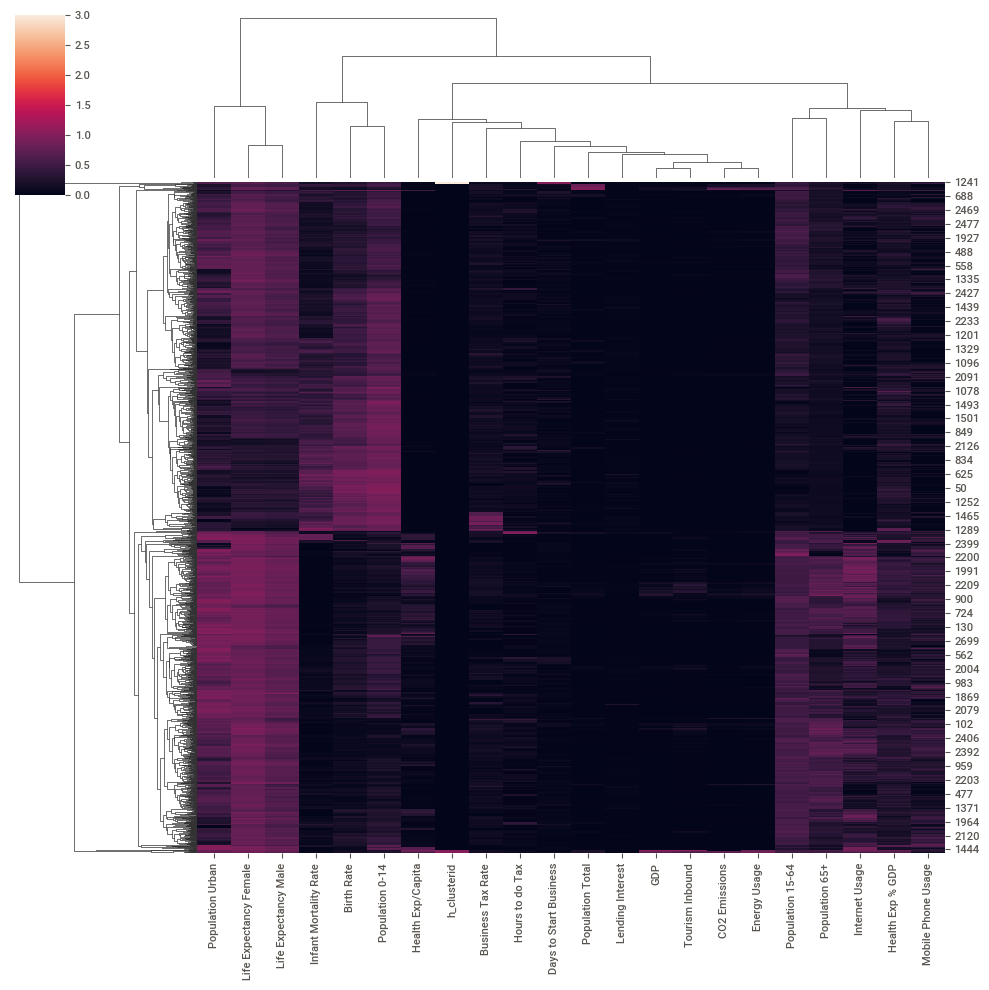

In [44]:
cg=sns.clustermap(df_norm)
plt.show()

# PCA

In [48]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [50]:
# Considering only numerical data 
df.data = df.iloc[:,:-1]
df.data.head()
# Converting into numpy array
UNI = df.data.values
UNI

array([[0.00000e+00, 2.00000e-02, 7.37125e+01, ..., 5.99000e-01,
        1.02000e+08, 1.93000e+08],
       [1.00000e+00, 5.00000e-02, 5.21000e+01, ..., 3.24000e-01,
        3.40000e+07, 1.46000e+08],
       [2.00000e+00, 4.30000e-02, 7.10875e+01, ..., 3.83000e-01,
        7.70000e+07, 5.00000e+07],
       ...,
       [2.70100e+03, 1.50000e-02, 4.19000e+01, ..., 9.48000e-01,
        2.22200e+09, 1.02800e+09],
       [2.70200e+03, 2.00000e-02, 6.19000e+01, ..., 8.89000e-01,
        9.04000e+08, 3.20200e+09],
       [2.70300e+03, 1.10000e-02, 0.00000e+00, ..., 9.49000e-01,
        2.50000e+07, 7.00000e+06]])

In [51]:
# Normalizing the numerical data 
uni_normal = scale(UNI)

C:\Users\91705\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:239: UserWarning:

Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.



In [52]:
uni_normal

array([[-1.73141037, -0.20494442,  0.76206583, ...,  0.13890313,
        -0.33129456, -0.30937152],
       [-1.73012927,  2.45634764,  0.22490646, ..., -0.97876697,
        -0.33654224, -0.3132317 ],
       [-1.72884817,  1.83537949,  0.6968238 , ..., -0.73897593,
        -0.33322386, -0.32111632],
       ...,
       [ 1.72884817, -0.6484931 , -0.02860542, ...,  1.55732808,
        -0.16769034, -0.2407917 ],
       [ 1.73012927, -0.20494442,  0.4684767 , ...,  1.31753704,
        -0.26940278, -0.06223779],
       [ 1.73141037, -1.00333204, -1.06999247, ...,  1.56139233,
        -0.33723679, -0.32464798]])

In [53]:
pca = PCA()
pca_values = pca.fit_transform(uni_normal)  #values fitted # calculated the zscore and pc (multiplied)

In [54]:
pca_values

array([[-1.44885733e+00, -5.23217350e-02,  1.72677488e+00, ...,
        -2.91106965e-02,  1.21544134e-01, -1.49196870e-04],
       [-6.41261983e+00,  1.74865853e+00, -2.78868221e-01, ...,
        -2.35916761e-02, -1.57986384e-01, -7.32253955e-04],
       [-4.39645820e+00,  8.95148643e-01,  2.13664533e-01, ...,
        -2.37430193e-02, -1.41566290e-01,  6.15882979e-05],
       ...,
       [ 2.77657807e+00, -1.33128433e+00, -1.74595268e+00, ...,
         3.71559106e-02,  3.42515609e-02, -6.30865419e-03],
       [ 1.03913156e+00, -5.35212847e-01, -5.85592312e-01, ...,
        -1.31609145e-01, -2.09495027e-02,  1.99336817e-04],
       [ 2.25975368e+00, -1.30936350e+00, -8.01398696e-01, ...,
         1.37143281e-04, -1.76539102e-02, -6.53760059e-03]])

In [55]:
pca = PCA(n_components = 6)   # dimensions=columns, PCS is as function #number of components
pca_values = pca.fit_transform(uni_normal)
pca_values

array([[-1.44885733, -0.05232182,  1.72676881, -0.51012254,  0.32030222,
        -0.88994286],
       [-6.41261988,  1.74865896, -0.27880514, -0.91605169,  2.51284096,
         1.06925107],
       [-4.39645822,  0.89514899,  0.2136987 , -1.64603776, -0.6712033 ,
        -0.15691804],
       ...,
       [ 2.77657807, -1.33128384, -1.74594256,  1.1134988 ,  0.32592244,
        -0.49602045],
       [ 1.03913155, -0.53521273, -0.58557519,  3.23045103,  1.18435554,
         1.79731009],
       [ 2.25975362, -1.30936284, -0.80131853, -0.26948619,  0.63291205,
        -0.3970316 ]])

In [56]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_   # ratio of the data 77%
var

array([0.36995548, 0.17558478, 0.07013398, 0.06138862, 0.04926403,
       0.04247483])

In [57]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([37.  , 54.56, 61.57, 67.71, 72.64, 76.89])

In [58]:
pca.components_    #to get components value from PCA

array([[ 8.41107109e-02, -3.03570639e-01, -1.00585799e-01,
         1.07772309e-01, -6.78723711e-02,  1.24628537e-01,
         1.54768158e-01,  1.19004700e-01,  2.33350434e-01,
        -3.92860359e-02, -2.76993321e-01,  2.75618022e-01,
        -1.07313682e-01,  3.00004087e-01,  2.97472513e-01,
         2.30539327e-01, -3.07661157e-01,  2.79252744e-01,
         2.69172571e-01,  4.03389619e-02,  2.32756154e-01,
         1.83028076e-01,  1.85868209e-01],
       [-3.09498188e-02,  1.21724466e-01,  1.34431711e-01,
         3.96759459e-01,  1.88045661e-02,  4.33996714e-01,
         4.04343444e-01,  9.80328964e-02,  2.29633404e-02,
         8.45015248e-02,  1.35963849e-01, -7.41057540e-02,
         3.80932798e-02, -1.33938864e-01, -1.25957932e-01,
        -1.04627382e-01,  9.57941319e-02, -1.15777899e-01,
        -4.36863929e-02,  3.07798034e-01, -9.34264916e-02,
         3.52272242e-01,  3.42085384e-01],
       [-4.60376088e-01, -1.97128512e-01, -1.71714180e-01,
         2.12188652e-01,  1.7

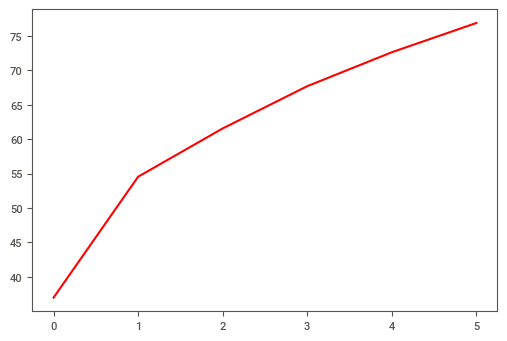

In [59]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")    # yaxis= variance=77,90,95%)

In [68]:
 pca_values[:,0:2]

array([[-1.44885733, -0.05232182],
       [-6.41261988,  1.74865896],
       [-4.39645822,  0.89514899],
       ...,
       [ 2.77657807, -1.33128384],
       [ 1.03913155, -0.53521273],
       [ 2.25975362, -1.30936284]])

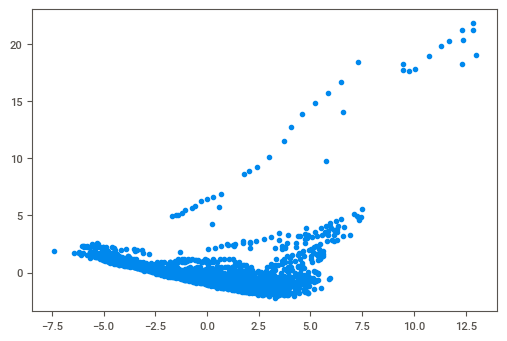

In [69]:
# plot between PCA1 and PCA2 # taking this data as the variance is more in PC1
x = pca_values[:,0:1]   #first columns PC1
y = pca_values[:,1:2]   
#z = pca_values[:2:3]
plt.scatter(x,y)

In [70]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), df[['df']]], axis = 1)
finalDf

KeyError: "None of [Index(['df'], dtype='object')] are in the [columns]"

In [67]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Univ',size=20)

NameError: name 'finalDf' is not defined

# TSNE

In [71]:
from pandas import read_csv
import pandas as pd

from sklearn.manifold import TSNE
from bioinfokit.visuz import cluster

In [72]:
#TSNE visualization
from bioinfokit.visuz import cluster

data_tsne = TSNE(n_components=2).fit_transform(X)    #2dimension hence 2 c components
cluster.tsneplot(score=data_tsne)

C:\Users\91705\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\91705\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [75]:
# get a list of categories
color_class = df['Country'].to_numpy()
cluster.tsneplot(score=data_tsne, colorlist=color_class, legendpos='upper right',legendanchor=(1.15, 1))

#Plot will be stored in the default directory

In [76]:
data_tsne  # tsne 1 and tsne 2

array([[ -4.5383296,   7.58363  ],
       [ 11.282215 ,  90.13467  ],
       [ 23.118942 ,  72.63292  ],
       ...,
       [-25.802599 , -21.726501 ],
       [-23.802202 ,  -7.125864 ],
       [-21.501186 , -29.845129 ]], dtype=float32)

# K Means

In [80]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

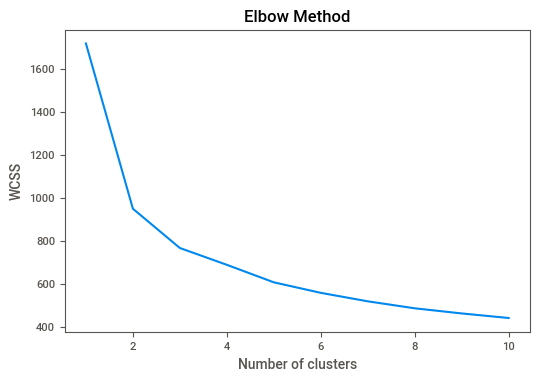

In [81]:
wcss = []   # within cluster sum of square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)   # scaled means already normalized
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [82]:
wcss

[1717.990768301147,
 948.7237629350667,
 765.7772715792468,
 687.5391036030801,
 606.0494614345794,
 557.0518367902455,
 517.6172813912731,
 485.09705335564536,
 461.16935510612353,
 439.97304898567603]

In [98]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(df_norm)
y_predict= kmeans.fit_predict(x)  


In [85]:
clusters_new.labels_

array([0, 1, 1, ..., 3, 2, 2])

In [87]:
#Assign clusters to the data set
df['clusterid_new'] = clusters_new.labels_

In [88]:
#these are standardized values.
clusters_new.cluster_centers_

array([[3.71891087e-01, 1.20755872e-01, 1.08277208e-02, 6.24216487e-02,
        1.40471897e-02, 4.62814622e-03, 2.13565874e-01, 1.49588730e-02,
        7.98219369e-02, 2.13169265e-01, 8.34522111e-02, 2.75758134e-02,
        6.72551117e-01, 5.74920981e-01, 1.27797727e-01, 5.78694610e-01,
        3.61715407e-01, 1.86852215e-01, 3.75505321e-02, 4.21472282e-01,
        7.76054647e-03, 1.73472348e-17],
       [6.98197578e-01, 1.95293240e-01, 1.11107010e-03, 6.63940490e-02,
        5.28369650e-03, 8.91518898e-04, 2.35817827e-01, 7.00796346e-03,
        9.89235860e-02, 5.24052910e-01, 2.65822785e-02, 3.61005130e-02,
        3.40090981e-01, 3.17076198e-01, 6.95111305e-02, 8.39025946e-01,
        1.49183314e-01, 1.12807921e-01, 1.29549764e-02, 2.65133339e-01,
        2.28996808e-03, 2.08166817e-17],
       [1.72689740e-01, 9.76876695e-02, 1.66574285e-02, 5.74172473e-02,
        2.07169680e-02, 9.94118432e-03, 2.60328145e-01, 7.87421694e-02,
        8.95453088e-02, 8.29910515e-02, 2.98124267e-01

In [89]:
#these are standardized values.
clusters_new.cluster_centers_

array([[3.71891087e-01, 1.20755872e-01, 1.08277208e-02, 6.24216487e-02,
        1.40471897e-02, 4.62814622e-03, 2.13565874e-01, 1.49588730e-02,
        7.98219369e-02, 2.13169265e-01, 8.34522111e-02, 2.75758134e-02,
        6.72551117e-01, 5.74920981e-01, 1.27797727e-01, 5.78694610e-01,
        3.61715407e-01, 1.86852215e-01, 3.75505321e-02, 4.21472282e-01,
        7.76054647e-03, 1.73472348e-17],
       [6.98197578e-01, 1.95293240e-01, 1.11107010e-03, 6.63940490e-02,
        5.28369650e-03, 8.91518898e-04, 2.35817827e-01, 7.00796346e-03,
        9.89235860e-02, 5.24052910e-01, 2.65822785e-02, 3.61005130e-02,
        3.40090981e-01, 3.17076198e-01, 6.95111305e-02, 8.39025946e-01,
        1.49183314e-01, 1.12807921e-01, 1.29549764e-02, 2.65133339e-01,
        2.28996808e-03, 2.08166817e-17],
       [1.72689740e-01, 9.76876695e-02, 1.66574285e-02, 5.74172473e-02,
        2.07169680e-02, 9.94118432e-03, 2.60328145e-01, 7.87421694e-02,
        8.95453088e-02, 8.29910515e-02, 2.98124267e-01

In [90]:
df

,Unnamed: 0,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country,clusterid_new
0,0,0.020,73.7125,87931.0,13.0,26998.0,5.479006e+10,0.035,60.0,336.0,...,0.0,0.342,0.619,0.039,31719449.0,0.599,1.020000e+08,1.930000e+08,Algeria,0
1,1,0.050,52.1000,9542.0,13.0,7499.0,9.129595e+09,0.034,22.0,336.0,...,0.0,0.476,0.499,0.025,13924930.0,0.324,3.400000e+07,1.460000e+08,Angola,1
2,2,0.043,71.0875,1617.0,40.0,1983.0,2.359122e+09,0.043,15.0,52.0,...,0.0,0.454,0.517,0.029,6949366.0,0.383,7.700000e+07,5.000000e+07,Benin,1
3,3,0.027,18.7250,4276.0,40.0,1836.0,5.788312e+09,0.047,152.0,52.0,...,0.1,0.383,0.587,0.029,1755375.0,0.532,2.270000e+08,2.090000e+08,Botswana,1
4,4,0.046,45.4875,1041.0,84.0,765.0,2.610959e+09,0.051,12.0,216.0,...,0.0,0.468,0.505,0.028,11607944.0,0.178,2.300000e+07,3.000000e+07,Burkina Faso,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,2699,0.013,0.0000,161.0,40.0,76.0,2.671401e+09,0.033,2718.0,52.0,...,0.4,0.292,0.637,0.071,32427.0,0.911,4.890000e+08,1.400000e+08,Turks and Caicos Islands,2
2700,2700,0.013,46.4000,91118.0,5.0,2132446.0,1.624460e+13,0.179,8895.0,175.0,...,1.0,0.196,0.667,0.136,313873685.0,0.811,2.000920e+11,1.265730e+11,United States,3
2701,2701,0.015,41.9000,737.0,7.0,19986.0,5.000435e+10,0.089,1308.0,310.0,...,1.5,0.220,0.639,0.140,3395253.0,0.948,2.222000e+09,1.028000e+09,Uruguay,3
2702,2702,0.020,61.9000,91118.0,144.0,27086.0,3.812862e+11,0.046,593.0,792.0,...,1.0,0.288,0.652,0.060,29954782.0,0.889,9.040000e+08,3.202000e+09,"Venezuela, RB",2


In [93]:
df[df["clusterid_new"]==3]

,Unnamed: 0,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country,clusterid_new
65,65,0.009,51.6500,1219589.0,72.0,518964.0,4.731199e+12,0.076,2834.0,155.0,...,0.5,0.146,0.682,0.172,126870000.0,0.786,5.970000e+09,4.264300e+10,Japan,3
91,91,0.011,57.1375,115709.0,13.0,58508.0,2.326727e+11,0.081,1845.0,336.0,...,0.5,0.176,0.655,0.169,10251250.0,0.971,6.592000e+09,9.429000e+09,Belgium,3
97,97,0.013,29.4625,47260.0,40.0,18634.0,1.600825e+11,0.087,2613.0,52.0,...,0.6,0.185,0.667,0.149,5339616.0,0.851,3.671000e+09,4.669000e+09,Denmark,3
100,100,0.011,45.1125,52141.0,40.0,32233.0,1.217938e+11,0.072,1700.0,52.0,...,0.7,0.182,0.669,0.149,5176209.0,0.822,2.035000e+09,2.293000e+09,Finland,3
102,102,0.009,46.9875,829978.0,72.0,336584.0,1.886401e+12,0.104,2387.0,155.0,...,0.6,0.156,0.681,0.163,82211508.0,0.731,2.494300e+10,5.760100e+10,Germany,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692,2692,0.010,0.0000,711.0,40.0,8.0,6.074507e+09,0.044,6708.0,52.0,...,0.9,0.389,0.576,0.035,39088.0,1.000,8.540000e+08,1.200000e+08,Sint Maarten (Dutch part),3
2693,2693,0.019,51.9000,634.0,19.0,19986.0,7.318519e+08,0.059,825.0,203.0,...,1.4,0.206,0.641,0.152,53584.0,0.318,9.400000e+07,1.400000e+07,St. Kitts and Nevis,3
2695,2695,0.016,0.0000,161.0,40.0,76.0,1.899810e+09,0.055,3553.0,52.0,...,1.1,0.292,0.637,0.071,30959.0,0.902,4.840000e+08,1.370000e+08,St. Martin (French part),3
2700,2700,0.013,46.4000,91118.0,5.0,2132446.0,1.624460e+13,0.179,8895.0,175.0,...,1.0,0.196,0.667,0.136,313873685.0,0.811,2.000920e+11,1.265730e+11,United States,3


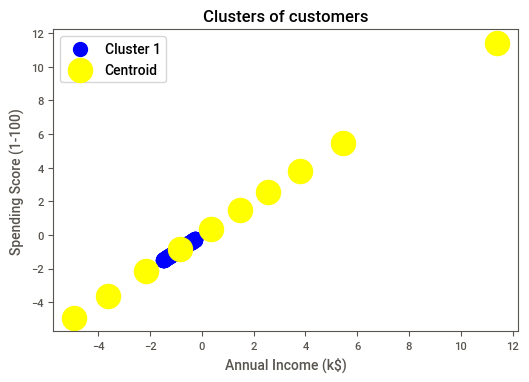

In [107]:
#visulaizing the clusters  
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1 ], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(kmeans.cluster_centers_[:, -1], kmeans.cluster_centers_[:, -1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  